<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_03/CRISP-DM/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM
This colab notebook contains all of the project deliverables related to the CMPE255 Assignment 3 CRISP-DM.

Name: Shawn Chumbar
Data Set Source:
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### Business Understanding
At this stage, we define the objectives of our project, the problem you're trying to solve, and the benefits of solving it.

Project Objective: Predict the salary of employees based on various attributes such as experience level, job title, company location, company size, etc.

Problem to solve: Be able to predict the salary of employees based on various attributes

Benefits: By solving this problem, we can target jobs in areas that contain the highest income, allowing us to rapidly grow our annual salary.

### Data Understanding
This section includes four tasks:
1. Collect Initial Data
2. Describe Data
3. Explore Data
4. Verify Data Quality

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load the dataset
ds_salaries = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_03/datasets/ds_salaries.csv')

In [5]:
# Shows interesting facts about the dataset
ds_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# Display the first few rows of the dataset
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# Check for missing values
missing_values = ds_salaries.isnull().sum()

# Summary statistics for numerical columns
numerical_summary = ds_salaries.describe()
missing_values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
numerical_summary

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


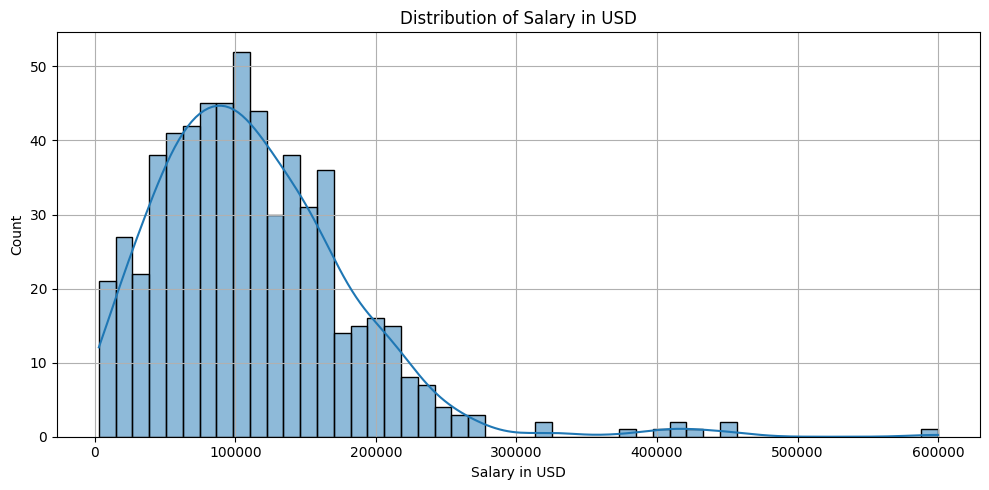

In [9]:
# Distribution of the target variable: salary_in_usd
plt.figure(figsize=(10, 5))
sns.histplot(ds_salaries['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()


At the end of this step, we've figured out the following information about the data:
1. The dataset contains 607 entries.
2. The salary column has a wide range, with a minimum of $4,000 and max of $30,400,000
3. The 'salary_in_usd' column has a range between $2859 to $600K.


### Data Preparation
In this Phase, we will perform the following tasks:
1. Drop columns that are unneccessary for modeling.
2. Encode categorical variables
3. Split the data into training and testing sets.

In [10]:
# Drop unnecessary columns
data = ds_salaries.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'])

# Encode categorical variables
label_encoders = {}
for column in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
9,2020,3,2,33,41,50,38,2
227,2021,2,2,22,14,50,12,0
591,2022,3,2,16,55,100,48,1
516,2022,3,2,21,55,100,48,1
132,2021,2,2,4,56,100,48,1


We have prepared the data by performing the following actions:
1. Unnecessary columns were removed.
2. Categorical variables have been encoded using label encoding.
3. Data has been split into training and testing sets, with 80% of data in the training set and 20% in the testing set.

### Modeling
For the modeling phase, we will choose to use the Random Forest Regressor since this model is most suitable for the dataset. It is suitable because:
1. It cna handle a mix of continous and categorical variables
2. It is robust to outliers, which there are plenty of in this dataset.
3. Offers feature importance, which can provide insights into which features may influence salary prediction.

In [11]:
from pycaret.regression import *

# Set up the PyCaret environment
reg1 = setup(data, target='salary_in_usd', train_size=0.8, session_id=42)

# For RandomForest specifically
rf_model = create_model('rf')

,Description,Value
0,Session id,42
1,Target,salary_in_usd
2,Target type,Regression
3,Original data shape,"(607, 9)"
4,Transformed data shape,"(607, 9)"
5,Transformed train set shape,"(485, 9)"
6,Transformed test set shape,"(122, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36744.8711,3923055703.1885,62634.3013,0.2038,0.5913,0.6554
1,44268.6738,3402175441.3710,58328.1702,0.4286,0.6401,0.6736
2,36843.0752,2331766696.9186,48288.3702,0.4663,0.5380,0.5557
3,31481.8004,3142965347.1750,56062.1561,0.5814,0.4178,0.3449
4,34244.2535,2665428537.6150,51627.7884,0.4057,0.4634,0.4171
5,44868.4574,4729420797.7995,68770.7845,0.2099,0.5280,0.5541
6,33689.8944,2277532382.3074,47723.4993,0.4578,0.4338,0.4177
7,27897.6402,1483542747.6236,38516.7853,0.4522,0.5095,0.4915
8,40768.2007,4161093140.1214,64506.5356,-0.0718,0.5974,0.6576


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Evaluation

Considering the distribution of the target variable (salary_in_usd), the models performance can be seen as reasonable, but there might be room for improvement.

Potential improvements include:
1. Trying different regression models or ensemble techniques.
2. Feature engineering to create new features or transform existing ones.
3. Handling outliers in the target variable more effectively.
4. Tuning hyperparameters of the Random Forest model.

In [12]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
predictions = predict_model(rf_model, data=X_test)
predictions

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,prediction_label
563,2022,3,2,17,55,100,48,1,140657.548354
289,2022,3,2,17,55,100,48,1,140657.548354
76,2021,2,2,5,55,100,48,1,125100.488095
78,2021,2,0,36,55,100,48,0,219522.720000
182,2021,2,2,17,47,0,48,0,42580.990000
...,...,...,...,...,...,...,...,...,...
249,2021,3,2,44,55,100,48,1,176160.960000
365,2022,3,2,22,55,100,48,1,168907.098144
453,2022,2,2,38,55,100,48,2,158029.835833
548,2022,3,2,12,55,100,48,1,113716.638466


##### Feature Importace

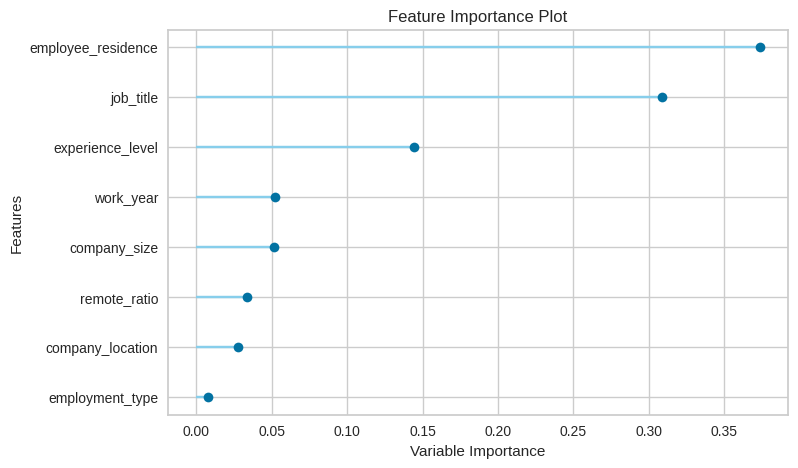

In [14]:
plot_model(rf_model, plot='feature')